1. Ön işleme yapılmış veriyi okuma

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "datasets/processed_thyroid_cancer_data.csv"
df = pd.read_csv(file_path)

print("İlk 5 Satır:")
print(df.head())

İlk 5 Satır:
        Age  Gender  Country  Ethnicity  Family_History  Radiation_Exposure  \
0  0.689189       1        6          2               0                   1   
1  0.189189       1        2          3               0                   1   
2  0.959459       1        5          2               0                   0   
3  0.810811       0        3          1               0                   0   
4  0.270270       0        2          0               1                   1   

   Iodine_Deficiency  Smoking  Obesity  Diabetes  TSH_Level  T3_Level  \
0                  0        0        0         0   0.936364  0.390000   
1                  0        0        0         0   0.174747  0.410000   
2                  0        0        0         0   0.622222  0.696667   
3                  0        0        0         0   0.404040  0.706667   
4                  0        0        0         0   0.909091  0.536667   

   T4_Level  Nodule_Size  Thyroid_Cancer_Risk  Diagnosis  
0  0.221333   

2. Bağımlı ve Bağımsız değişkenleri ayırma

In [23]:
# Hedef değişkenimiz: Diagnosis (0 = Benign, 1 = Malignant)
X = df.drop(columns=["Diagnosis"])  # Özellikler
y = df["Diagnosis"]  # Etiket

# Eğitim ve test kümelerine ayırma (%70 eğitim - %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Eğitim Verisi:", X_train.shape, y_train.shape)
print("Test Verisi:", X_test.shape, y_test.shape)

Eğitim Verisi: (148883, 15) (148883,)
Test Verisi: (63808, 15) (63808,)


3. Karar Ağacı Modelini Oluşturma (Entropi Tabanlı)

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Entropi kriterine göre model oluştur
#model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, scoring='f1', cv=5)
grid.fit(X_train, y_train)
print("En iyi parametreler:", grid.best_params_)

En iyi parametreler: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


4. Test Verisi ile Tahmin ve Performans Değerlendirmesi

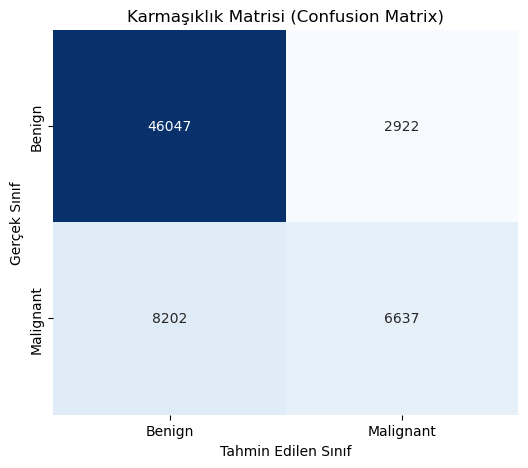

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Karmaşıklık Matrisi ve metrikler
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karmaşıklık Matrisi (Confusion Matrix)")
plt.show()

In [27]:
print("Ölçüm Metrikleri:")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Ölçüm Metrikleri:

Accuracy: 0.8257
Recall: 0.4473
Specificity: 0.9403
Precision: 0.6943
F1 Score: 0.5441


5. ROC Eğrisi

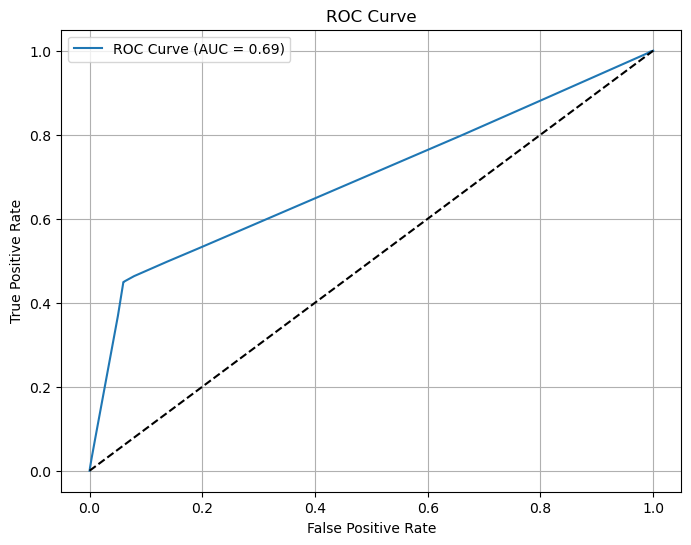

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC eğrisi için olasılık tahmini
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

6. Karar Ağacı Görselleştirme

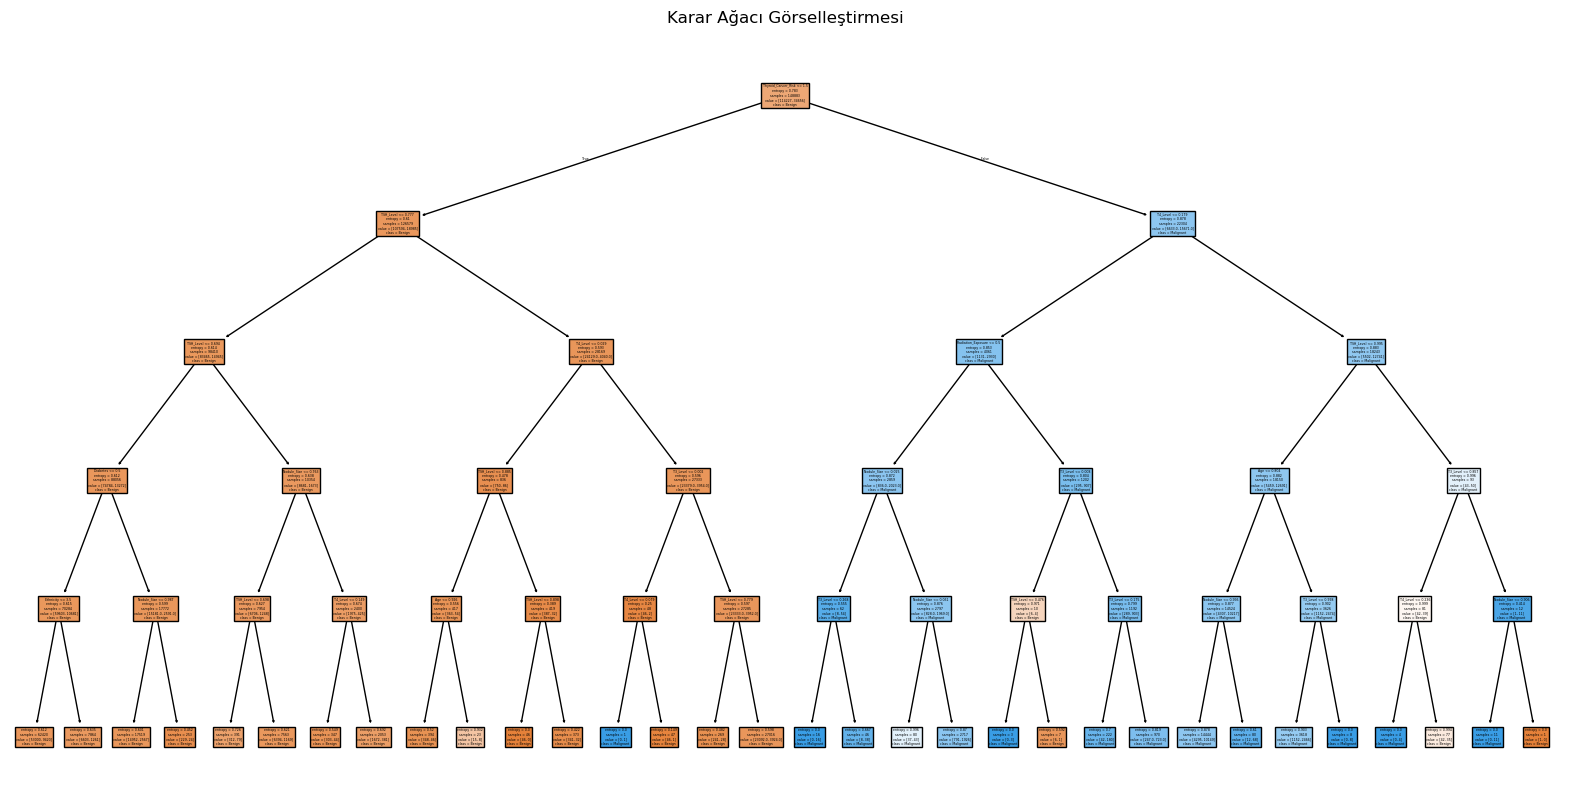

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Benign", "Malignant"])
plt.title("Karar Ağacı Görselleştirmesi")
plt.show()